In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os

from scipy.stats import linregress

In [33]:
#Import wine data csv

wine_data_df = pd.read_csv('Resources/winemag-data-130k-v2.csv')
wine_data_df.drop(["Unnamed: 0","country","description","designation","province","region_1","region_2","taster_name","taster_twitter_handle","title"], axis=1, inplace=True)
wine_data_df.dropna(how="all")
wine_data_df.to_csv('filtered_wine_data.csv')
wine_data_df.head()

,points,price,variety,winery
0,87,NaN,White Blend,Nicosia
1,87,15.0,Portuguese Red,Quinta dos Avidagos
2,87,14.0,Pinot Gris,Rainstorm
3,87,13.0,Riesling,St. Julian
4,87,65.0,Pinot Noir,Sweet Cheeks


In [34]:
# Describe the data

wine_data_df.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [35]:
# Count datapoints with prices greater than $100

wine_data_df[wine_data_df.price > 100].count()

points     3366
price      3366
variety    3366
winery     3366
dtype: int64

In [36]:
# Count datapoints with prices $100 and less

wine_data_df[wine_data_df.price < 101].count()

points     117609
price      117609
variety    117608
winery     117609
dtype: int64

In [37]:
# Calculate Quartiles 

q1=wine_data_df["price"].quantile(.25)
q2=wine_data_df["price"].quantile(.75)
wine_data_df_price_vs_rating=(wine_data_df[wine_data_df["price"]
                                 .between((q1 - (1.5*(q2-q1))), (q2 + (1.5*(q2-q1))), inclusive=True)][["price","points"]].dropna(how="any"))

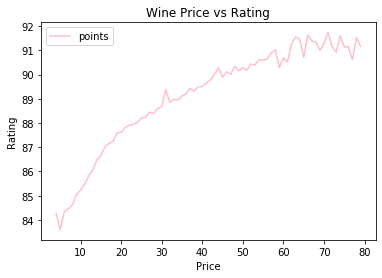

In [44]:
# Generate a line plot of Wine Price (mean) vs Rating between the lower and upper outliers

price_mean_points_df=wine_data_df_price_vs_rating.sort_values(by="price", ascending="false").groupby("price").mean()
price_mean_points_df.plot(color="pink")
plt.title('Wine Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.savefig('Wine Price vs Rating Between Outliers Line Graph')
plt.show()

The r-squared is: 0.5382606411587938


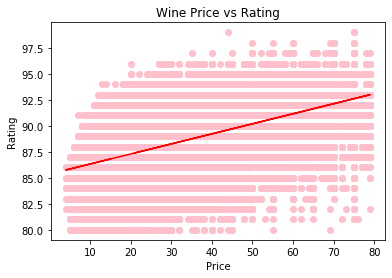

<Figure size 432x288 with 0 Axes>

In [45]:
# Generate a linear regression model of Price versus Rating (mean) between the lower and upper outlier

def plot_linear_regression(x_values, y_values, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    plt.scatter(x_values,y_values, color='pink')
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel("Price")
    plt.ylabel("Rating")
    print(f"The r-squared is: {rvalue}")
    plt.show()

x_values = wine_data_df_price_vs_rating["price"]
y_values = wine_data_df_price_vs_rating["points"]

plt.title('Wine Price vs Rating')
plot_linear_regression(x_values,y_values, (6,30))
plt.savefig('Wine Price vs Rating Between Outliers Linear Regression')
plt.show()

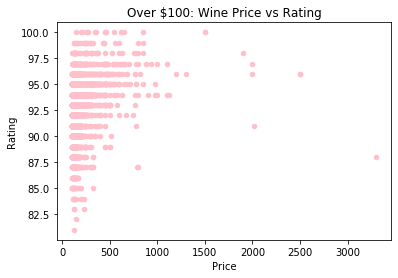

In [46]:
# Create a scatterplot to compare Wine Price vs Rating for bottles over $100

over_100_df=wine_data_df[wine_data_df.price > 101]
over_100_df.plot(kind='scatter',x='price',y='points',color='pink')
plt.xlabel("Price")
plt.ylabel("Rating")
plt.title("Over $100: Wine Price vs Rating")
plt.savefig('Wine Price (over $100) vs Rating Scatter Plot')
plt.show()

The r-squared is: 0.24732482815939155


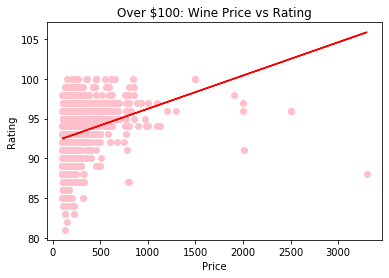

<Figure size 432x288 with 0 Axes>

In [47]:
# Generate a linear regression model to compare Wine Price vs Rating for bottles over $100

def plot_linear_regression(x_values, y_values, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    plt.scatter(x_values,y_values, color='pink')
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel("Price")
    plt.ylabel("Rating")
    print(f"The r-squared is: {rvalue}")
    plt.show()

x_values = over_100_df["price"]
y_values = over_100_df["points"]

plt.title('Over $100: Wine Price vs Rating')
plot_linear_regression(x_values,y_values, (6,30))

plt.savefig('Wine Price (over $100) vs Rating Linear Regression')
plt.show()

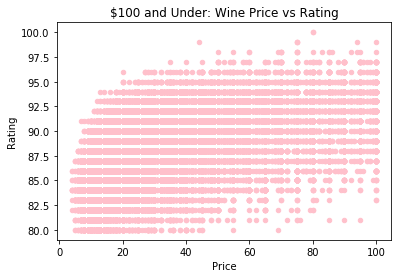

In [50]:
# Create a scatterplot to compare Wine Price vs Rating for bottles $100 and under

under_100_df=wine_data_df[wine_data_df.price < 101]
under_100_df.plot(kind='scatter',x='price',y='points',color='pink')
plt.xlabel("Price")
plt.ylabel("Rating")
plt.title("$100 and Under: Wine Price vs Rating")

plt.savefig('Wine Price ($100 and Under) vs Rating Scatter Plot')
plt.show()

The r-squared is: 0.5480918114444551


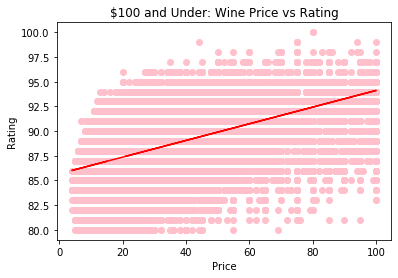

<Figure size 432x288 with 0 Axes>

In [51]:
# Generate a linear regression model to compare Wine Price vs Rating for bottles $100 and under

def plot_linear_regression(x_values, y_values, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    plt.scatter(x_values,y_values, color='pink')
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel("Price")
    plt.ylabel("Rating")
    print(f"The r-squared is: {rvalue}")
    plt.show()

x_values = under_100_df["price"]
y_values = under_100_df["points"]

plt.title('$100 and Under: Wine Price vs Rating')
plot_linear_regression(x_values,y_values, (6,30))

plt.savefig('Wine Price ($100 and Under) vs Rating Linear Regression')
plt.show()